Cross-validation accuracy: 0.1666 ± 0.0005
Training Accuracy: 0.1669

Classification Report:
              precision    recall  f1-score   support

      cancel       0.17      0.17      0.17       596
        down       0.17      0.29      0.21       600
        left       0.17      0.29      0.21       600
       right       0.00      0.00      0.00       600
      select       0.17      0.08      0.11       600
          up       0.17      0.17      0.17       600

    accuracy                           0.17      3596
   macro avg       0.14      0.17      0.14      3596
weighted avg       0.14      0.17      0.14      3596


Confusion Matrix:
[[100 174 173   0  49 100]
 [100 175 175   0  50 100]
 [100 175 175   0  50 100]
 [100 175 175   0  50 100]
 [100 175 175   0  50 100]
 [100 175 175   0  50 100]]

AUC-ROC Score: 0.5005


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


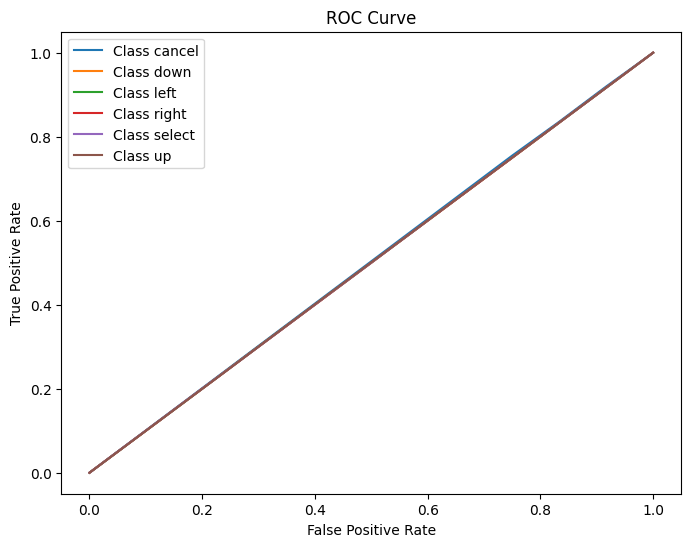

In [4]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import numpy as np
df_sorted=pd.read_csv("/content/final_dataset.csv")
# Ensure only numeric features are used, excluding 'epoch'
X = df_sorted.drop(columns=['subject', 'session', 'epoch', 'target'])  # Drop non-numeric features + 'epoch'
y = df_sorted['target']

# Initialize Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, max_depth=None, random_state=42, class_weight="balanced")

# Perform cross-validation for accuracy scores
cv_scores = cross_val_score(rf_model, X, y, cv=5, scoring='accuracy')
print(f"Cross-validation accuracy: {cv_scores.mean():.4f} ± {cv_scores.std():.4f}")

# Train on full dataset
rf_model.fit(X, y)

# Predictions
y_pred = rf_model.predict(X)
y_pred_proba = rf_model.predict_proba(X)

# Model Evaluation
accuracy = accuracy_score(y, y_pred)
print(f"Training Accuracy: {accuracy:.4f}")
print("\nClassification Report:")
print(classification_report(y, y_pred))

# Confusion Matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y, y_pred))

# AUC-ROC (Only for multi-class classification)
if len(np.unique(y)) > 2:
    auc_roc = roc_auc_score(y, y_pred_proba, multi_class='ovr')
    print(f"\nAUC-ROC Score: {auc_roc:.4f}")

    # Plot ROC Curves
    plt.figure(figsize=(8, 6))
    for i, label in enumerate(np.unique(y)):
        fpr, tpr, _ = roc_curve(y, y_pred_proba[:, i], pos_label=label)
        plt.plot(fpr, tpr, label=f'Class {label}')

    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curve")
    plt.legend()
    plt.show()
